## Clean-up

### Import

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

import nltk
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob, Word

#https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline
%matplotlib inline

In [2]:
df_office_com = pd.read_csv('office_comments.csv')
df_pandr_com = pd.read_csv('pandr_comments.csv')

In [3]:
df_office_com

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
0,Omg_Itz_Winke,1602110427,g81ucdo,He went out of his way to wish me a happy birt...,t1_g81ec6q,/r/DunderMifflin/comments/j6yhy6/hide_is_back_...,32,DunderMifflin,comment,2020-10-07
1,jaybankzz,1602110433,g81ucq1,"In America, heart surgeon patient. Steady life...",t3_j6yhy6,/r/DunderMifflin/comments/j6yhy6/hide_is_back_...,2,DunderMifflin,comment,2020-10-07
2,yusaltyboi,1602110441,g81uda1,People go missing in the finger lakes,t1_g81ub14,/r/DunderMifflin/comments/j70msh/oh_jim_carrey...,5,DunderMifflin,comment,2020-10-07
3,I_Like_Something,1602110443,g81udda,YES! LIVE LONG HIDE!,t3_j6yhy6,/r/DunderMifflin/comments/j6yhy6/hide_is_back_...,1,DunderMifflin,comment,2020-10-07
4,acepie100,1602110453,g81ue2t,I can’t believe they made Will Ferrell the bos...,t3_j7118q,/r/DunderMifflin/comments/j7118q/reposting_the...,2,DunderMifflin,comment,2020-10-07
...,...,...,...,...,...,...,...,...,...,...
9995,[deleted],1593559289,fwj1wv8,[deleted],t1_fwii6ng,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,DunderMifflin,comment,2020-06-30
9996,HermioneGranger429,1593559334,fwj1zvs,No one can dislike someone more than Michael d...,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,2,DunderMifflin,comment,2020-06-30
9997,wywyfiz,1593559335,fwj1zy7,oh god,t3_hiqcz9,/r/DunderMifflin/comments/hiqcz9/this_picture_...,1,DunderMifflin,comment,2020-06-30
9998,okhi2u,1593559360,fwj21hy,one L too many you spelled it wrong ;-),t1_fwisno7,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,DunderMifflin,comment,2020-06-30


In [4]:
df_pandr_com

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
0,equipped_metalblade,1602111063,g81viyl,"I have a penis now...it’s, resplendent",t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,PandR,comment,2020-10-07
1,[deleted],1602111103,g81vltr,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
2,phattsrules,1602111491,g81wdhv,I call posting this weekly post next week!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
3,[deleted],1602111513,g81wf3a,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
4,goosepoopriot,1602111628,g81wn4k,Good catch!!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
...,...,...,...,...,...,...,...,...,...,...
9995,rottenkartoffel,1593581910,fwk1kh6,HAM AND MAYONNAISE!!!!!!!,t1_fwjzuop,/r/PandR/comments/hj2azc/watching_the_office_f...,1,PandR,comment,2020-07-01
9996,The_Drunken_Whale,1593582125,fwk1u6d,The armed men will storm the room and take you...,t1_fwjsva7,/r/PandR/comments/hizdpo/you_want_to_buy_a_pro...,2,PandR,comment,2020-07-01
9997,[deleted],1593582208,fwk1xtc,[removed],t3_hj32ro,/r/PandR/comments/hj32ro/someone_buy_this_for_...,1,PandR,comment,2020-07-01
9998,The_Drunken_Whale,1593582247,fwk1zjj,Where are the armed men who taken the men who ...,t3_hizdpo,/r/PandR/comments/hizdpo/you_want_to_buy_a_pro...,1,PandR,comment,2020-07-01


In [5]:
df = pd.concat([df_pandr_com, df_office_com])

In [6]:
df

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
0,equipped_metalblade,1602111063,g81viyl,"I have a penis now...it’s, resplendent",t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,PandR,comment,2020-10-07
1,[deleted],1602111103,g81vltr,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
2,phattsrules,1602111491,g81wdhv,I call posting this weekly post next week!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
3,[deleted],1602111513,g81wf3a,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
4,goosepoopriot,1602111628,g81wn4k,Good catch!!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,PandR,comment,2020-10-07
...,...,...,...,...,...,...,...,...,...,...
9995,[deleted],1593559289,fwj1wv8,[deleted],t1_fwii6ng,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,DunderMifflin,comment,2020-06-30
9996,HermioneGranger429,1593559334,fwj1zvs,No one can dislike someone more than Michael d...,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,2,DunderMifflin,comment,2020-06-30
9997,wywyfiz,1593559335,fwj1zy7,oh god,t3_hiqcz9,/r/DunderMifflin/comments/hiqcz9/this_picture_...,1,DunderMifflin,comment,2020-06-30
9998,okhi2u,1593559360,fwj21hy,one L too many you spelled it wrong ;-),t1_fwisno7,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,DunderMifflin,comment,2020-06-30


In [7]:
df['subreddit'] = df['subreddit'].map({'PandR': 1, 'DunderMifflin': 0})

In [8]:
df

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
0,equipped_metalblade,1602111063,g81viyl,"I have a penis now...it’s, resplendent",t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,comment,2020-10-07
1,[deleted],1602111103,g81vltr,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
2,phattsrules,1602111491,g81wdhv,I call posting this weekly post next week!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
3,[deleted],1602111513,g81wf3a,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
4,goosepoopriot,1602111628,g81wn4k,Good catch!!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
...,...,...,...,...,...,...,...,...,...,...
9995,[deleted],1593559289,fwj1wv8,[deleted],t1_fwii6ng,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,0,comment,2020-06-30
9996,HermioneGranger429,1593559334,fwj1zvs,No one can dislike someone more than Michael d...,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,2,0,comment,2020-06-30
9997,wywyfiz,1593559335,fwj1zy7,oh god,t3_hiqcz9,/r/DunderMifflin/comments/hiqcz9/this_picture_...,1,0,comment,2020-06-30
9998,okhi2u,1593559360,fwj21hy,one L too many you spelled it wrong ;-),t1_fwisno7,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,0,comment,2020-06-30


In [9]:
#checking up some mod comments
df['body'].duplicated().sum()

1067

In [10]:
df[df['body'].duplicated()].head()

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
3,[deleted],1602111513,g81wf3a,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
39,[deleted],1602115738,g824afc,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
45,[deleted],1602116245,g825617,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
50,[deleted],1602117213,g826vnb,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
72,ettmausonan,1602123914,g82js4t,DELETE ALL PICTURES OF RON,t1_g82ihv5,/r/PandR/comments/j6t2gg/while_watching_the_go...,2,1,comment,2020-10-07


In [11]:
df[df['body'].duplicated()].tail()

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
9882,TheFukkingSwqmpKING,1593645025,fwmz4we,Amazing,t1_fwmyu5c,/r/DunderMifflin/comments/hjl980/bet_you_haven...,1,0,comment,2020-07-01
9953,PunnuRaand,1593558224,fwizz2x,Thanks,t1_fwivdm6,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,6,0,comment,2020-06-30
9956,[deleted],1593558268,fwj01yj,[deleted],t3_hixc32,/r/DunderMifflin/comments/hixc32/rant_once_aga...,1,0,comment,2020-06-30
9986,SeeleyZ,1593558986,fwj1d02,Yes!,t1_fwj1awo,/r/DunderMifflin/comments/hiyj4a/watching_the_...,1,0,comment,2020-06-30
9995,[deleted],1593559289,fwj1wv8,[deleted],t1_fwii6ng,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,0,comment,2020-06-30


In [12]:
df.drop_duplicates('body', inplace = True)

In [13]:
df.shape

(18933, 10)

In [14]:
df.head()

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time
0,equipped_metalblade,1602111063,g81viyl,"I have a penis now...it’s, resplendent",t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,comment,2020-10-07
1,[deleted],1602111103,g81vltr,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
2,phattsrules,1602111491,g81wdhv,I call posting this weekly post next week!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
4,goosepoopriot,1602111628,g81wn4k,Good catch!!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07
5,Zenkraft,1602112060,g81xh8n,Took tramadol once for legitimate back pain an...,t1_g81ubku,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07


## Clean Words

In [15]:
#https://towardsdatascience.com/the-real-world-as-seen-on-twitter-sentiment-analysis-part-one-5ac2d06b63fb great blogpost
import re
import string

def clean(body):
    body = body.lower()
    body = re.sub(r'\&\w*;', '', body) # Remove HTML special entities (e.g. &amp;)
    body = re.sub(r'[' + string.punctuation.replace('@', '') + ']+', ' ', body) # Remove Punctuation and split 's, 't, 've with a space for filter
    body = re.sub(r'\b\w{1,2}\b', '', body) # Remove words with 2 or fewer letters
    body = re.sub(r'\s\s+', ' ', body) # Remove whitespace (including new line characters)
    body = body.lstrip(' ') # Remove single space remaining at the front of the tweet.
    body = ''.join(c for c in body if c <= '\uFFFF')  # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    body = re.sub(r'https?:\/\/.*\/\w*', '', body) # Remove hyperlinks
    body = re.sub(r'#\w*', '', body) # Remove hashtags
    return body

In [16]:
df['cleaned'] = df['body'].map(lambda x: clean(x))

In [17]:
df.shape

(18933, 11)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18933 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   author       18933 non-null  object
 1   created_utc  18933 non-null  int64 
 2   id           18933 non-null  object
 3   body         18933 non-null  object
 4   parent_id    18933 non-null  object
 5   permalink    18933 non-null  object
 6   score        18933 non-null  int64 
 7   subreddit    18933 non-null  int64 
 8   ptype        18933 non-null  object
 9   time         18933 non-null  object
 10  cleaned      18933 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.7+ MB


In [19]:
df.head()

,author,created_utc,id,body,parent_id,permalink,score,subreddit,ptype,time,cleaned
0,equipped_metalblade,1602111063,g81viyl,"I have a penis now...it’s, resplendent",t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,comment,2020-10-07,have penis now ’ resplendent
1,[deleted],1602111103,g81vltr,[removed],t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07,removed
2,phattsrules,1602111491,g81wdhv,I call posting this weekly post next week!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07,call posting this weekly post next week
4,goosepoopriot,1602111628,g81wn4k,Good catch!!,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07,good catch
5,Zenkraft,1602112060,g81xh8n,Took tramadol once for legitimate back pain an...,t1_g81ubku,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,comment,2020-10-07,took tramadol once for legitimate back pain an...


In [20]:
df = df.drop(df[df.author == '[deleted]'].index)

In [21]:
df = df.drop(columns = ['body', 'ptype'])

In [22]:
df.shape

(18923, 9)

## NLP

In [23]:
df1 = df[df['subreddit'] == 1]

In [24]:
df1

,author,created_utc,id,parent_id,permalink,score,subreddit,time,cleaned
0,equipped_metalblade,1602111063,g81viyl,t1_g81m7k9,/r/PandR/comments/j6t2gg/while_watching_the_go...,4,1,2020-10-07,have penis now ’ resplendent
2,phattsrules,1602111491,g81wdhv,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,call posting this weekly post next week
4,goosepoopriot,1602111628,g81wn4k,t3_j6t2gg,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,good catch
5,Zenkraft,1602112060,g81xh8n,t1_g81ubku,/r/PandR/comments/j6t2gg/while_watching_the_go...,1,1,2020-10-07,took tramadol once for legitimate back pain an...
6,DBZOverlord123,1602112118,g81xlgj,t1_g81ifc7,/r/PandR/comments/j6t2gg/while_watching_the_go...,7,1,2020-10-07,jean ralphio line makes die inside and laugh l...
...,...,...,...,...,...,...,...,...,...
9993,smartysocks,1593581472,fwk10ct,t1_fwiw1o1,/r/PandR/comments/hivr1a/i_made_an_intro_versi...,1,1,2020-07-01,did may ask how you made this was special edit...
9995,rottenkartoffel,1593581910,fwk1kh6,t1_fwjzuop,/r/PandR/comments/hj2azc/watching_the_office_f...,1,1,2020-07-01,ham and mayonnaise
9996,The_Drunken_Whale,1593582125,fwk1u6d,t1_fwjsva7,/r/PandR/comments/hizdpo/you_want_to_buy_a_pro...,2,1,2020-07-01,the armed men will storm the room and take you...
9998,The_Drunken_Whale,1593582247,fwk1zjj,t3_hizdpo,/r/PandR/comments/hizdpo/you_want_to_buy_a_pro...,1,1,2020-07-01,where are the armed men who taken the men who ...


In [25]:
df0 = df[df['subreddit'] == 0]

In [26]:
df0

,author,created_utc,id,parent_id,permalink,score,subreddit,time,cleaned
0,Omg_Itz_Winke,1602110427,g81ucdo,t1_g81ec6q,/r/DunderMifflin/comments/j6yhy6/hide_is_back_...,32,0,2020-10-07,went out his way wish happy birthday agree wit...
2,yusaltyboi,1602110441,g81uda1,t1_g81ub14,/r/DunderMifflin/comments/j70msh/oh_jim_carrey...,5,0,2020-10-07,people missing the finger lakes
3,I_Like_Something,1602110443,g81udda,t3_j6yhy6,/r/DunderMifflin/comments/j6yhy6/hide_is_back_...,1,0,2020-10-07,yes live long hide
4,acepie100,1602110453,g81ue2t,t3_j7118q,/r/DunderMifflin/comments/j7118q/reposting_the...,2,0,2020-10-07,can’ believe they made will ferrell the boss f...
5,photoshark0,1602110527,g81uitd,t1_g81t5mj,/r/DunderMifflin/comments/j70h0m/what_is_your_...,2,0,2020-10-07,nellie got much better when she became regular...
...,...,...,...,...,...,...,...,...,...
9994,TheFukkingSwqmpKING,1593559205,fwj1rb2,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,1,0,2020-06-30,’ joke from the show calm down
9996,HermioneGranger429,1593559334,fwj1zvs,t1_fwj0p40,/r/DunderMifflin/comments/hiygi8/dont_know_don...,2,0,2020-06-30,one can dislike someone more than michael disl...
9997,wywyfiz,1593559335,fwj1zy7,t3_hiqcz9,/r/DunderMifflin/comments/hiqcz9/this_picture_...,1,0,2020-06-30,god
9998,okhi2u,1593559360,fwj21hy,t1_fwisno7,/r/DunderMifflin/comments/hitb1d/a_beard_makes...,1,0,2020-06-30,one too many you spelled wrong


In [27]:
# Stopwords, https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

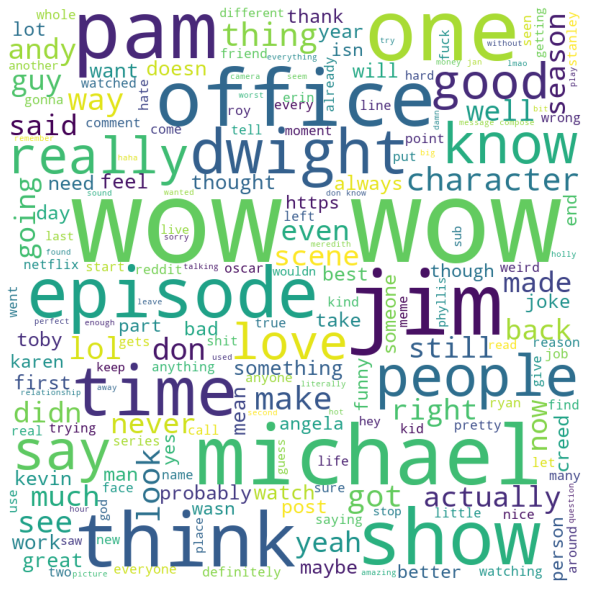

In [28]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df0['cleaned']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

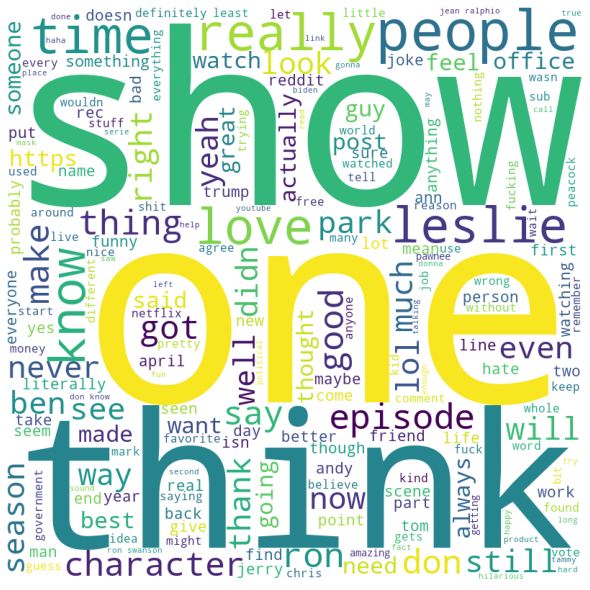

In [29]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df1['cleaned']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

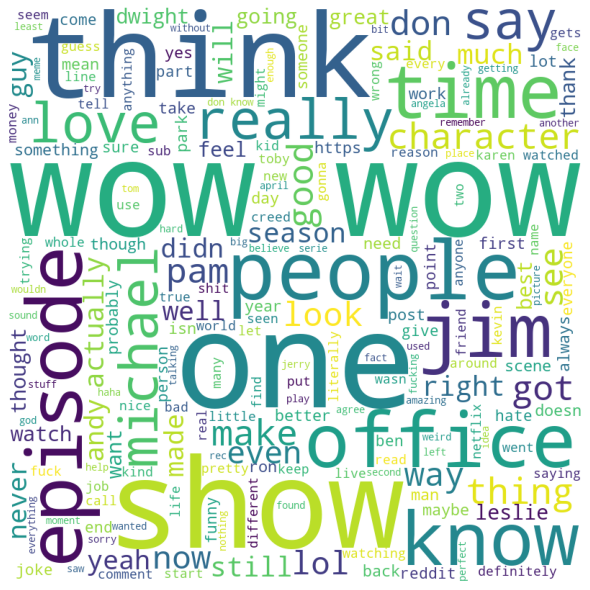

In [30]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df['cleaned']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Lemmatize

In [31]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    lemma_words = ''
    for word in words:
        lemma_words += (lemmatizer.lemmatize(word) + ' ')
    return lemma_words

In [32]:
df['cleaned'] = df['cleaned'].apply(lemmatize_words)

In [33]:
df.shape

(18923, 9)

In [51]:
df['cleaned'].isnull().sum()

0

In [34]:
df.to_csv('clean.csv', index = False)

### CountVectorizer

In [35]:
#cats
cvect = CountVectorizer(stop_words = "english") 

In [36]:
pandr_words = cvect.fit_transform(df1['cleaned'])

In [37]:
len(cvect.get_feature_names())

12631

In [38]:
df1_vec = pd.DataFrame(pandr_words.toarray(), columns=cvect.get_feature_names())

In [39]:
#https://medium.com/@cristhianboujon/how-to-list-the-most-common-words-from-text-corpus-using-scikit-learn-dad4d0cab41d
psum_words = pandr_words.sum(axis=0)
pwords_freq = [(pword, psum_words[0, idx]) for pword, idx in cvect.vocabulary_.items()]     
pwords_freq = sorted(pwords_freq, key = lambda x: x[1], reverse=True)
pwords_freq[:25]

[('like', 1017),
 ('just', 908),
 ('don', 523),
 ('people', 509),
 ('think', 482),
 ('know', 445),
 ('good', 405),
 ('time', 397),
 ('ron', 384),
 ('really', 378),
 ('leslie', 368),
 ('https', 354),
 ('love', 321),
 ('did', 309),
 ('got', 302),
 ('com', 290),
 ('right', 288),
 ('episode', 287),
 ('didn', 271),
 ('season', 269),
 ('watch', 255),
 ('ben', 252),
 ('make', 227),
 ('lol', 225),
 ('way', 224)]

In [40]:
#DunderMifflin
ovect = CountVectorizer(stop_words = "english") 

In [41]:
office_words = ovect.fit_transform(df0['cleaned'])

In [42]:
len(ovect.get_feature_names())

11372

In [43]:
df0_vec = pd.DataFrame(office_words.toarray(), columns=ovect.get_feature_names())

In [44]:
osum_words = office_words.sum(axis=0)
owords_freq = [(oword, osum_words[0, idx]) for oword, idx in ovect.vocabulary_.items()]     
owords_freq = sorted(owords_freq, key = lambda x: x[1], reverse=True)
owords_freq[:25]

[('wow', 1249),
 ('just', 916),
 ('like', 893),
 ('jim', 613),
 ('michael', 583),
 ('pam', 498),
 ('office', 498),
 ('think', 495),
 ('don', 478),
 ('time', 382),
 ('people', 374),
 ('know', 371),
 ('dwight', 360),
 ('good', 344),
 ('did', 339),
 ('really', 336),
 ('episode', 309),
 ('love', 276),
 ('didn', 275),
 ('got', 264),
 ('https', 257),
 ('way', 249),
 ('right', 246),
 ('lol', 241),
 ('character', 231)]

In [45]:
#https://stackoverflow.com/questions/7558908/unpacking-a-list-tuple-of-pairs-into-two-lists-tuples
pword_list = []
pfreq_list = []
i = 0
for word in pwords_freq:
    pword_list.append(word[0])
    pfreq_list.append(word[1])
    i += 1
    if i > 10:
        break
pword_list

['like',
 'just',
 'don',
 'people',
 'think',
 'know',
 'good',
 'time',
 'ron',
 'really',
 'leslie']

In [46]:
#DunderMifflin
oword_list = []
ofreq_list = []
i = 0
for word in owords_freq:
    oword_list.append(word[0])
    ofreq_list.append(word[1])
    i += 1
    if i > 10:
        break
oword_list

['wow',
 'just',
 'like',
 'jim',
 'michael',
 'pam',
 'office',
 'think',
 'don',
 'time',
 'people']

Text(0.5, 1.0, 'Top 10 Words in Parks and Recreation')

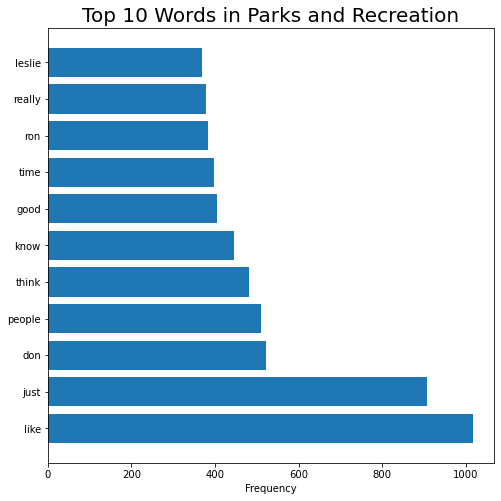

In [47]:
#cats
plt.figure(figsize=(8, 8))
plt.barh(pword_list, pfreq_list)
plt.xlabel('Frequency')
plt.title('Top 10 Words in Parks and Recreation', fontsize=20)

Text(0.5, 1.0, 'Top 10 Words in DunderMifflin')

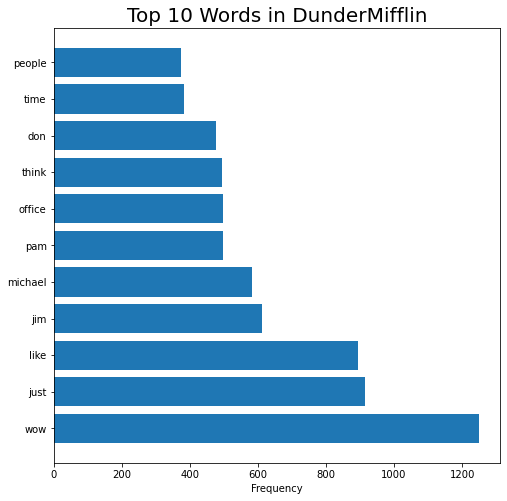

In [48]:
plt.figure(figsize=(8, 8))
plt.barh(oword_list, ofreq_list)
plt.xlabel('Frequency')
plt.title('Top 10 Words in DunderMifflin', fontsize=20)

<Figure size 1440x720 with 0 Axes>

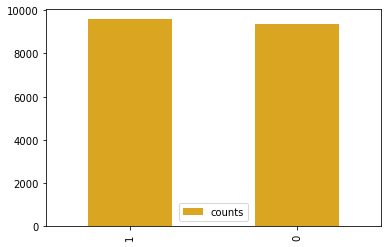

In [61]:
counts = pd.DataFrame({'counts': df['subreddit'].value_counts()} )

plt.figure(figsize=(20,10));
counts.plot(kind='bar', color=['goldenrod'])
plt.savefig('counts_bar.jpg');